In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.optimize import curve_fit
%matplotlib inline

In [83]:
images1152 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01152 - MLpiezoscan.npy')
images1160 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01160 - MLpiezoscan.npy')
images1161 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01161 - MLpiezoscan.npy')
scan1161 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01161 - MLpiezoscan.csv', delimiter=',')

scan1162 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01162 - MLpiezoscan.csv', delimiter=',')
scan1158 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/01158 - MLpiezoscan.csv', delimiter=',')


images_list = [images1152, images1160, images1161]
print len(images1152[0][1])

401


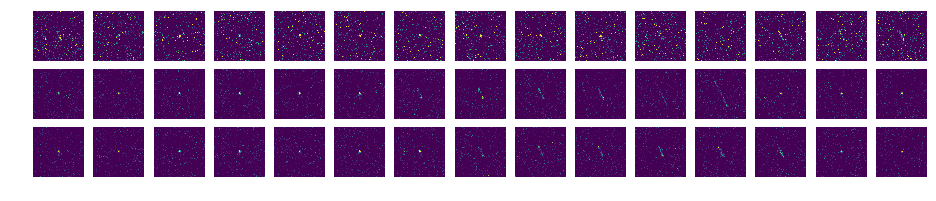

In [101]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
for i in range(len(images_list)):
    for j in range(15):
        ax = plt.subplot(15,15,15*i + j +1)
        ax.set_axis_off()
        ax.imshow(images_list[i][j], clim = [400,1200])
    #ax.imshow(images_503[i] + images_504[i] + images_505[i] + images_506[i] + images_507[i])
plt.subplots_adjust(hspace=0.01)
# fig.tight_layout()

Rotated Images

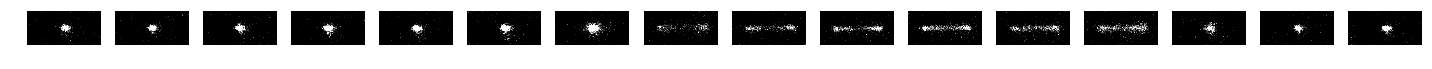

In [61]:
%matplotlib inline
voltages = np.linspace(2.7,5.2, 16) - 3.405
#print voltages
mod_images_list = [images1160, images1161]
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
summed = []
for i in range(16):
        ax = plt.subplot(1,16,1 + i)
        ax.set_axis_off()
        rotated = rotate(mod_images_list[1][i], -25)
        cropped = rotated[200:330,240:300] 
        summed.append(np.sum(np.rot90(cropped), axis=0))
        ax.imshow(np.rot90(cropped), clim=[500, 1100], cmap='gray')

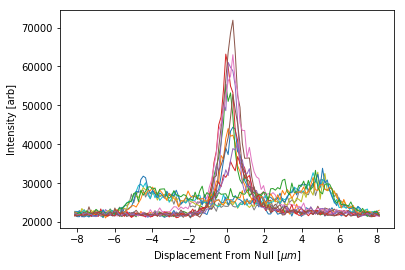

In [102]:
%matplotlib inline
x = (np.linspace(200,330,130))/8.0
for item in summed:
    plt.plot(x - np.median(x), item, linewidth = 1)
    
plt.xlabel(r'Displacement From Null [$\mu m$]')
plt.ylabel(r'Intensity [arb]')

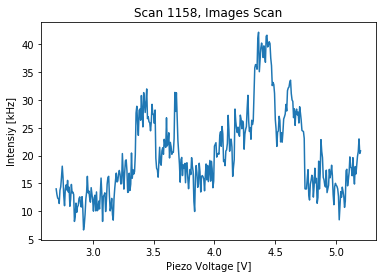

In [98]:
%matplotlib inline
volts1161 = scan1161[:,0]
counts1161 = scan1161[:,1]
plt.plot(volts1161, counts1161)
plt.title('Scan 1158, Images Scan')
plt.xlabel('Piezo Voltage [V]')
plt.ylabel('Intensiy [kHz]')

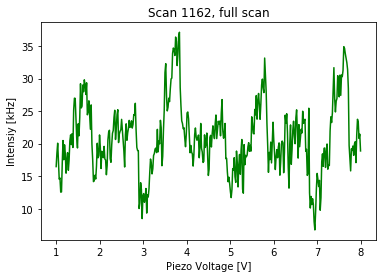

In [99]:
%matplotlib inline
volts1162 = scan1162[:,0]
counts1162 = scan1162[:,1]
plt.plot(volts1162, counts1162, 'g')
plt.title('Scan 1162, full scan')
plt.xlabel('Piezo Voltage [V]')
plt.ylabel('Intensiy [kHz]')